In [9]:
import ROOT
import matplotlib.pyplot as plt
import math

In [17]:
file_name="target_standard_mu-_1930_0.root"

In [51]:
file=ROOT.TFile.Open(file_name,"READ")
events=file.Events
events.Print()

******************************************************************************
*Tree    :Events    : Tree Created by SimAna                                 *
*Entries :    10000 : Total =        54146412 bytes  File  Size =   10309434 *
*        :          : Tree compression factor =   5.25                       *
******************************************************************************
*Br    0 :eventID   : eventID/I                                              *
*Entries :    10000 : Total  Size=      40645 bytes  File Size  =      14173 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   2.83     *
*............................................................................*
*Br    1 :totalTime : totalTime/F                                            *
*Entries :    10000 : Total  Size=      40657 bytes  File Size  =      35273 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.14     *
*...................................................

In [104]:
thetas=[0.244974, 0, -0.244974]
z_target=-300
sagittas=[[],[],[],[],[],[]] #um,xm,vm,up,xp,vp
for entry in events:
    #if entry.truthtrack_pz_vtx[0] < 60:
    #    continue
    #if entry.truthtrack_x_vtx[0]>0.5 or entry.truthtrack_y_vtx[0]>0.5:
    #    continue
    dc0s = [[],[],[]] #u, x, v
    dc2s =[[], [] ,[]]
    dc3s=[[],[]] #m, p
    for hit_ind in range(entry.n_hits):
        if entry.hit_detID[hit_ind] == 2:
            dc0s[0].append(hit_ind)
        elif entry.hit_detID[hit_ind] == 4:
            dc0s[1].append(hit_ind)
        elif entry.hit_detID[hit_ind] == 6:
            dc0s[2].append(hit_ind)
        elif entry.hit_detID[hit_ind] == 18:
            dc2s[0].append(hit_ind)
        elif entry.hit_detID[hit_ind] == 16:
            dc2s[1].append(hit_ind)
        elif entry.hit_detID[hit_ind] == 14:
            dc2s[2].append(hit_ind)
        elif entry.hit_detID[hit_ind] == 30:
            dc3s[0].append(hit_ind)
        elif entry.hit_detID[hit_ind] == 24:
            dc3s[1].append(hit_ind) 
    for i in range(6):
        type_ind = i%3
        mp_ind = math.floor(i/3)
        if len(dc0s[type_ind]) == 0 or len(dc2s[type_ind])==0 or len(dc3s[mp_ind]) == 0:
            continue
        theta = thetas[type_ind]
        ind_dc0 = dc0s[type_ind][0]
        ind_dc2 = dc2s[type_ind][0]
        ind_dc3 = dc3s[mp_ind][0]
        z_dc0 = entry.hit_truthz[ind_dc0]
        pos_dc0 = entry.hit_truthx[ind_dc0] * math.cos(theta) + entry.hit_truthy[ind_dc0] * math.cos(theta)
        z_dc2 = entry.hit_truthz[ind_dc2]
        pos_dc2 = entry.hit_truthx[ind_dc2] * math.cos(theta) + entry.hit_truthy[ind_dc2] * math.cos(theta)
        z_dc3 = entry.hit_truthz[ind_dc3]
        pos_dc3 = entry.hit_truthx[ind_dc3] * math.cos(theta) + entry.hit_truthy[ind_dc3] * math.cos(theta)
        s1 = pos_dc0 - pos_dc3 * (z_dc0 - z_target)/(z_dc3 - z_target)
        s2 = pos_dc2 - pos_dc3 * (z_dc2 - z_target)/(z_dc3 - z_target)
        sagitta_ratio=s1/s2
        if sagitta_ratio > 0 and sagitta_ratio < 5: 
            sagittas[i].append(sagitta_ratio)
        
        
        
        
        
        
        

In [105]:
all_sagittas = sagittas[0] + sagittas[1] + sagittas[2] + sagittas[3] + sagittas[4] + sagittas[5]

(array([0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        6.000e+00, 3.000e+00, 1.000e+00, 7.000e+00, 5.000e+00, 2.000e+00,
        7.000e+00, 9.000e+00, 2.600e+01, 2.600e+01, 3.200e+01, 5.900e+01,
        7.800e+01, 1.280e+02, 2.190e+02, 3.400e+02, 6.310e+02, 1.160e+03,
        2.073e+03, 2.756e+03, 2.966e+03, 2.689e+03, 2.456e+03, 1.978e+03,
        1.464e+03, 7.410e+02, 3.310e+02, 3.600e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85

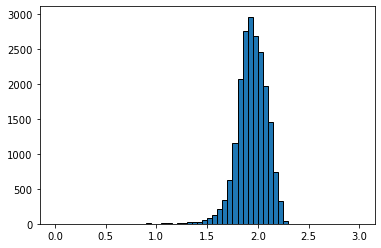

In [106]:
plt.hist(all_sagittas, bins=60, range=(0.0,3.0), edgecolor='black')

In [107]:

import statistics as stcs
stcs.mean(all_sagittas)
stcs.stdev(all_sagittas)

0.15132702813104562